In [9]:
import sys
sys.path.append("/home/gant/Documents/tpcanalysis/python_comp/src")
from openCSV import openCSV
from processUVWLines import processUVWLines
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import RANSACRegressor
from skimage.measure import LineModelND, ransac

In [19]:
#This version uses the UVW csv



data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-20T10-51-39.459_0005.csv")

#data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-20T10-51-39.459_0000.csv") #25 314 568

#data_csv_uvw = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/uvwcsv/CoBo_2018-06-16T10-18-38.616_0000.csv") #12
data_csv_uvw.readCSV()

entry_nr = 1311
singular_entry_uvw = data_csv_uvw.m_data[data_csv_uvw.m_data["entry_nr"]==entry_nr]


if singular_entry_uvw.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")

The value  1311  was found in the 'entry_nr' column.


At plane  0 The equation is y =  0.7895935741497585  * x +  -68.226680886956 

At plane  0 The equation is y =  0.08318157784115905  * x +  28.23395265574173 

At plane  1 The equation is y =  -0.39133963593353466  * x +  98.57197101488327 

At plane  1 The equation is y =  -0.06666326256920807  * x +  55.20289672931046 

At plane  2 The equation is y =  -0.0024208958718340535  * x +  42.33773138241509 

At plane  2 The equation is y =  -0.3925762257502175  * x +  98.18083018544151 



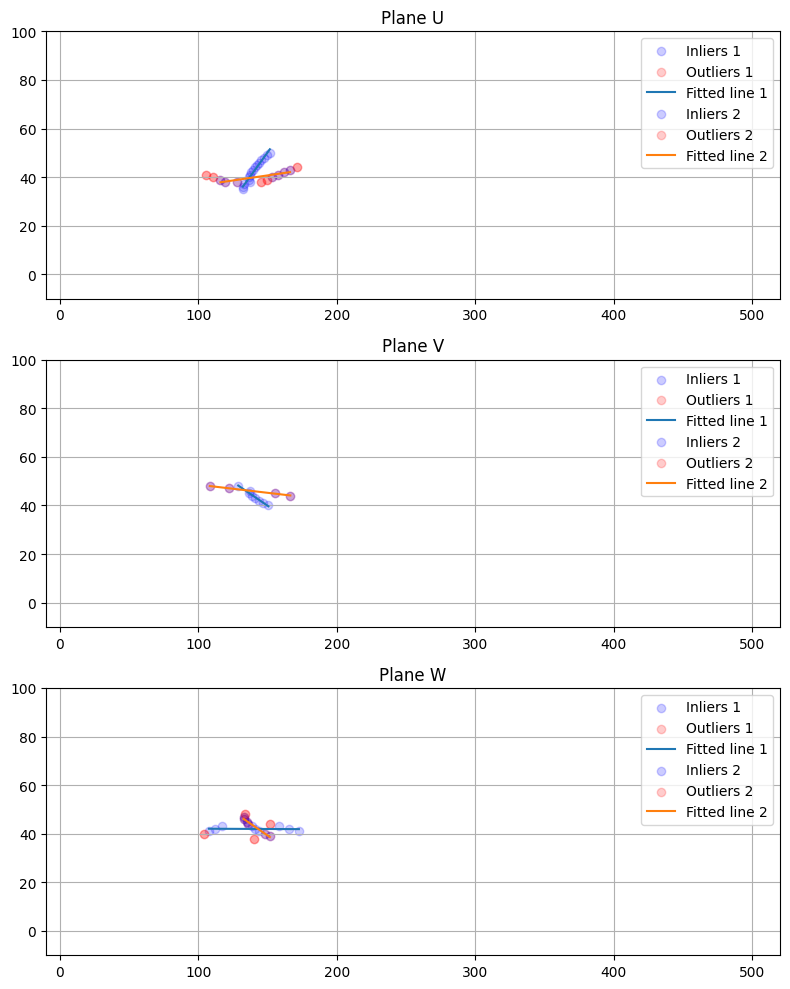

In [20]:
#Use RANSAC in 2D to fit a line to the data set. Format is UVW.
line_proc_uvw = processUVWLines(singular_entry_uvw)

nr_lines=2

verbose=True

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

model_uvw = line_proc_uvw.fitNLines(axes, nr_lines, True, 3, 1.25)

if(verbose):
    for i in range(len(model_uvw)):
        print("At plane ", model_uvw[i].plane, "The equation is y = ", model_uvw[i].slope, " * x + ", model_uvw[i].intercept, "\n")


# Adjust spacing between subplots
plt.tight_layout()


# Display the plot
plt.show()    

At plane  0 The equation is y =  0.0914431635341774  * x +  27.79572636801993 

At plane  0 The equation is y =  0.3208492608685267  * x +  -0.0235816974148735 

At plane  0 The equation is y =  0.2650220111696312  * x +  -0.022128912146603077 

At plane  1 The equation is y =  0.30468204802692933  * x +  -8.34030245959024e-05 

At plane  1 The equation is y =  -0.09993628495574486  * x +  59.02990306478898 

At plane  2 The equation is y =  0.2983025511503248  * x +  0.07387402844305359 

At plane  2 The equation is y =  0.003899547620838829  * x +  42.231225991129875 

At plane  2 The equation is y =  0.3462381331008819  * x +  -0.09953063896385987 



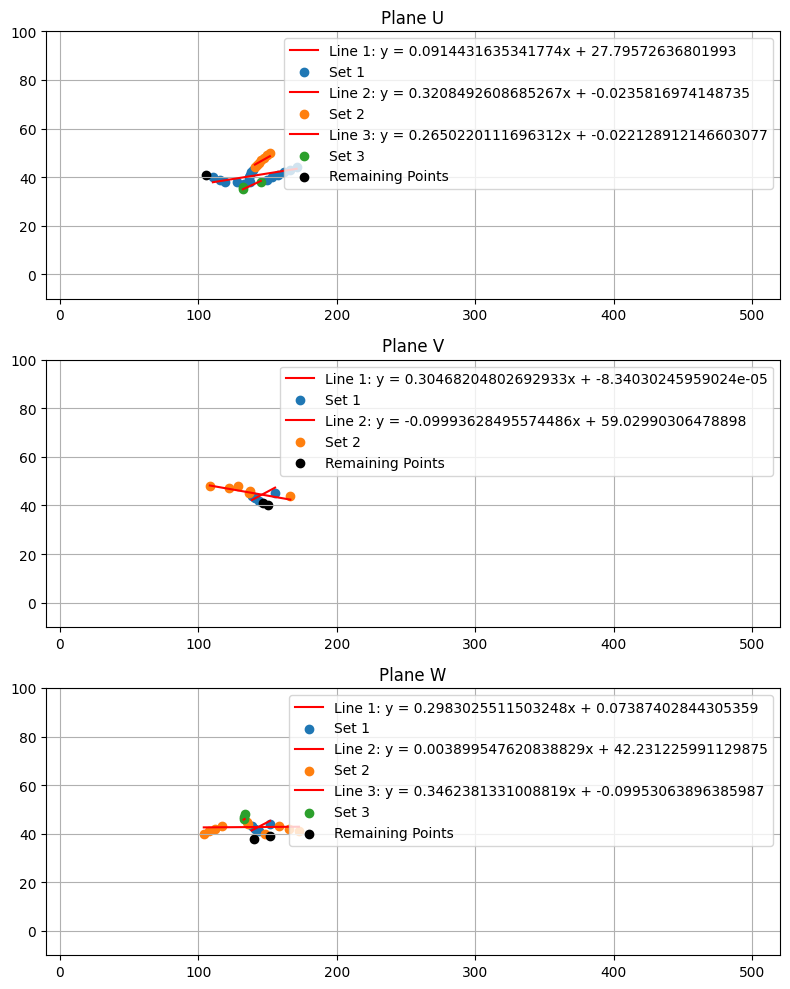

In [21]:
#Use Hough Transform in 2D
line_proc_uvw = processUVWLines(singular_entry_uvw)

nr_lines=5

verbose=True

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

model_hough = line_proc_uvw.fitNLinesHough(axes, nr_lines, True, 3, 2)

if(verbose):
    for i in range(len(model_hough)):
        print("At plane ", model_hough[i].plane, "The equation is y = ", model_hough[i].m, " * x + ", model_hough[i].b, "\n")


# Adjust spacing between subplots
plt.tight_layout()


# Display the plot
plt.show()    